<a href="https://colab.research.google.com/github/sanketkokate712/ISRO/blob/main/sank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install opencv-python matplotlib rasterio


In [32]:
!pip install opencv-python matplotlib rasterio



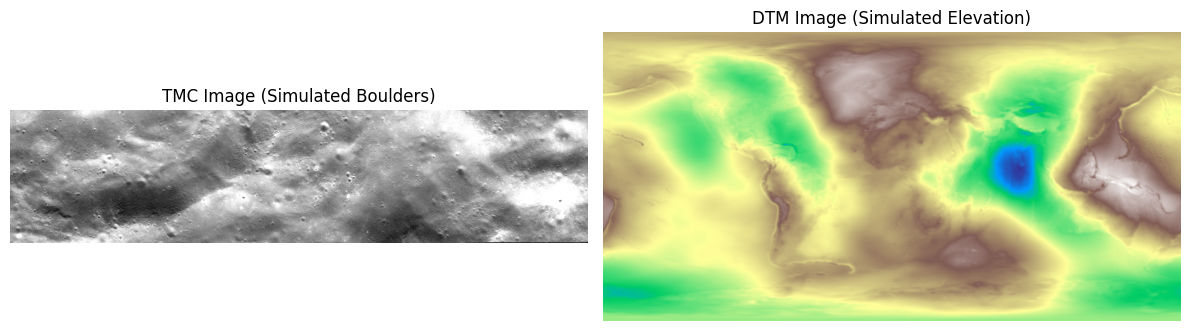

In [33]:
import cv2
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Load TMC grayscale image
tmc_path = "moon_surface.jpg"
tmc_img = cv2.imread(tmc_path, cv2.IMREAD_GRAYSCALE)

# Load DTM (elevation) image
dtm_path = "/content/us_nga_egm96_15.tif"
with rasterio.open(dtm_path) as dtm_src:
    dtm = dtm_src.read(1)

# Show both images
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(tmc_img, cmap='gray')
plt.title("TMC Image (Simulated Boulders)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(dtm, cmap='terrain')
plt.title("DTM Image (Simulated Elevation)")
plt.axis("off")

plt.tight_layout()
plt.show()


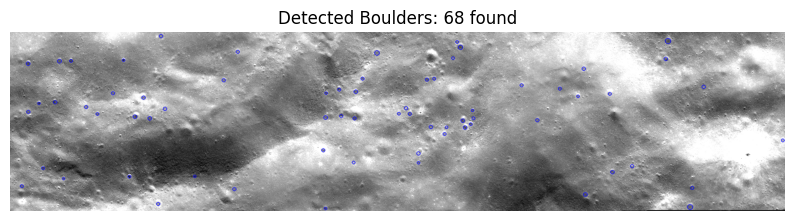

✅ Boulder detection done and results saved to CSV!


,X,Y,Diameter_Px,Elevation
0,374,292,5.12,-8.570000
1,242,292,6.37,-46.060001
2,91,141,7.07,11.910000
3,123,58,6.17,-3.630000
4,1168,328,7.84,24.850000


from matplotlib import pyplot as plt
_df_0['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Diameter_Px'].plot(kind='hist', bins=20, title='Diameter_Px')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Elevation'].plot(kind='hist', bins=20, title='Elevation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Y', y='Diameter_Px', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Diameter_Px', y='Elevation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['X'].plot(kind='line', figsize=(8, 4), title='X')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Diameter_Px'].plot(kind='line', figsize=(8, 4), title='Diameter_Px')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Elevation'].plot(kind='line', figsize=(8, 4), title='Elevation')
plt.gca().spines[['top', 'right']].set_visible(False)

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load TMC again just in case
tmc_img = cv2.imread("/content/moon_surface.jpg", cv2.IMREAD_GRAYSCALE)

# --- Set up blob detector parameters ---
params = cv2.SimpleBlobDetector_Params()

params.filterByArea = True
params.minArea = 20
params.maxArea = 500

params.filterByCircularity = True
params.minCircularity = 0.6

params.filterByConvexity = False
params.filterByInertia = False

# Create detector
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(tmc_img)

# --- Draw keypoints ---
im_with_keypoints = cv2.drawKeypoints(
    tmc_img, keypoints, np.array([]),
    (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# --- Plot results ---
plt.figure(figsize=(10, 6))
plt.imshow(im_with_keypoints)
plt.title(f"Detected Boulders: {len(keypoints)} found")
plt.axis("off")
plt.show()

# --- Store stats from DTM ---
import rasterio
with rasterio.open("/content/us_nga_egm96_15.tif") as dtm_src:
    dtm = dtm_src.read(1)

boulder_data = []
for k in keypoints:
    x, y = int(k.pt[0]), int(k.pt[1])
    size = round(k.size, 2)
    elev = round(dtm[y, x], 2) if 0 <= y < dtm.shape[0] and 0 <= x < dtm.shape[1] else -1
    boulder_data.append((x, y, size, elev))

# --- Save to CSV ---
import pandas as pd
df = pd.DataFrame(boulder_data, columns=["X", "Y", "Diameter_Px", "Elevation"])
df.to_csv("boulder_detection_output.csv", index=False)

print("✅ Boulder detection done and results saved to CSV!")
df.head()

In [ ]:
from matplotlib import pyplot as plt
_df_2['Diameter_Px'].plot(kind='hist', bins=20, title='Diameter_Px')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_2['Diameter_Px'].plot(kind='hist', bins=20, title='Diameter_Px')
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-37-1986302038.py:68: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


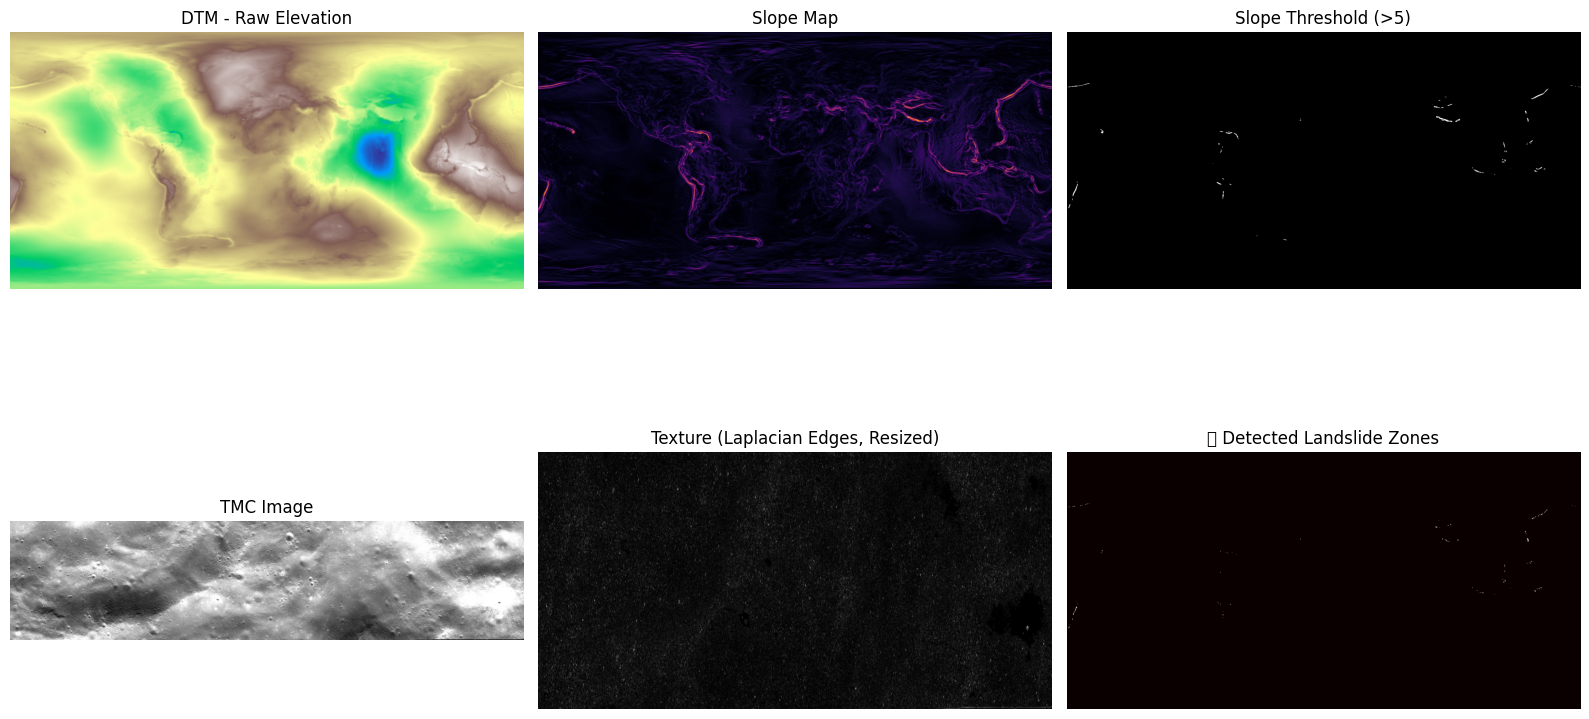

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rasterio

# --- Load DTM ---
with rasterio.open("us_nga_egm96_15.tif") as dtm_src:
    dtm = dtm_src.read(1)

# --- Compute slope from elevation ---
dy, dx = np.gradient(dtm)
slope = np.sqrt(dx**2 + dy**2)

# Normalize slope for visualization
slope_normalized = ((slope - slope.min()) / (slope.max() - slope.min()) * 255).astype(np.uint8)

# --- Load TMC grayscale image ---
tmc_img = cv2.imread("moon_surface.jpg", cv2.IMREAD_GRAYSCALE)

# Edge detection using Laplacian
edges = cv2.Laplacian(tmc_img, cv2.CV_64F)
edges_abs = np.abs(edges)
edges_norm = ((edges_abs - edges_abs.min()) / (edges_abs.max() - edges_abs.min()) * 255).astype(np.uint8)

# --- Resize edge image to match DTM shape ---
edges_resized = cv2.resize(edges_norm, (dtm.shape[1], dtm.shape[0]), interpolation=cv2.INTER_LINEAR)

# --- Thresholds ---
slope_thresh = slope > 5            # Slope threshold (lowered)
edges_thresh = edges_resized > 15   # Texture threshold (lowered)

# --- Combine masks to detect landslide zones ---
landslide_mask = slope_thresh & edges_thresh

# --- Debug Visualization ---
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.imshow(dtm, cmap='terrain')
plt.title("DTM - Raw Elevation")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(slope_normalized, cmap='inferno')
plt.title("Slope Map")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(slope_thresh, cmap='gray')
plt.title("Slope Threshold (>5)")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(tmc_img, cmap='gray')
plt.title("TMC Image")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(edges_resized, cmap='gray')
plt.title("Texture (Laplacian Edges, Resized)")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(landslide_mask, cmap='hot')
plt.title("🚨 Detected Landslide Zones")
plt.axis("off")

plt.tight_layout()
plt.show()


✅ Boulder CSV loaded successfully.


/tmp/ipython-input-36-3661353043.py:83: UserWarning: Glyph 127765 (\N{FULL MOON SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127765 (\N{FULL MOON SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


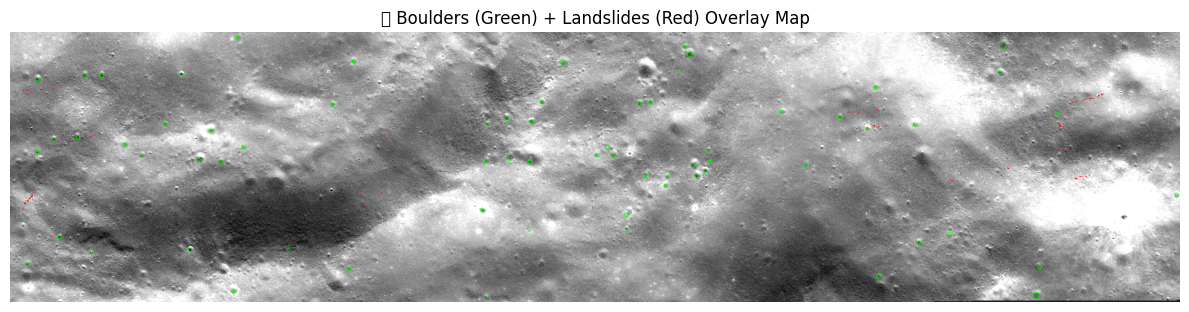

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rasterio
import os

# --- Load TMC grayscale and convert to color ---
tmc_img = cv2.imread("moon_surface.jpg", cv2.IMREAD_GRAYSCALE)
tmc_img_color = cv2.cvtColor(tmc_img, cv2.COLOR_GRAY2RGB)

# --- Load DTM and compute slope ---
with rasterio.open("us_nga_egm96_15.tif") as dtm_src:
    dtm = dtm_src.read(1)

dy, dx = np.gradient(dtm)
slope = np.sqrt(dx**2 + dy**2)
slope_thresh = slope > 5

# --- Edge Detection on TMC image ---
edges = cv2.Laplacian(tmc_img, cv2.CV_64F)
edges_abs = np.abs(edges)
edges_norm = ((edges_abs - edges_abs.min()) / (edges_abs.max() - edges_abs.min()) * 255).astype(np.uint8)
edges_resized = cv2.resize(edges_norm, (dtm.shape[1], dtm.shape[0]), interpolation=cv2.INTER_LINEAR)
edges_thresh = edges_resized > 15

# --- Landslide detection mask (from slope + texture) ---
landslide_mask = slope_thresh & edges_thresh

# --- Resize landslide mask to match TMC image ---
resized_mask = cv2.resize(landslide_mask.astype(np.uint8), (tmc_img.shape[1], tmc_img.shape[0]), interpolation=cv2.INTER_NEAREST)
resized_mask = resized_mask.astype(bool)

# --- Overlay red zones for landslides ---
overlay = tmc_img_color.copy()
overlay[resized_mask] = [255, 0, 0]  # Red overlay for landslides

# --- Load or Generate Boulder CSV ---
csv_path = "boulder_detection_output.csv"
if not os.path.exists(csv_path):
    print("⚠️ CSV not found! Generating boulder detections...")

    # Detect blobs in TMC image
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = 20
    params.maxArea = 500
    params.filterByCircularity = True
    params.minCircularity = 0.6
    params.filterByConvexity = False
    params.filterByInertia = False

    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(tmc_img)

    # Extract boulder info
    boulder_data = []
    for k in keypoints:
        x, y = int(k.pt[0]), int(k.pt[1])
        size = round(k.size, 2)
        elev = round(dtm[y, x], 2) if 0 <= y < dtm.shape[0] and 0 <= x < dtm.shape[1] else -1
        boulder_data.append((x, y, size, elev))

    df = pd.DataFrame(boulder_data, columns=["X", "Y", "Diameter_Px", "Elevation"])
    df.to_csv(csv_path, index=False)
    print("✅ CSV generated and saved.")
else:
    df = pd.read_csv(csv_path)
    print("✅ Boulder CSV loaded successfully.")

# --- Overlay green circles for detected boulders ---
for _, row in df.iterrows():
    x, y = int(row["X"]), int(row["Y"])
    radius = max(1, int(row["Diameter_Px"] / 2))
    if 0 <= y < overlay.shape[0] and 0 <= x < overlay.shape[1]:
        cv2.circle(overlay, (x, y), radius, (0, 255, 0), 1)

# --- Final Output Plot ---
plt.figure(figsize=(12, 6))
plt.imshow(overlay)
plt.title("🌕 Boulders (Green) + Landslides (Red) Overlay Map")
plt.axis("off")
plt.tight_layout()
plt.show()


In [49]:
pip install numpy rasterio scikit-image scikit-learn geopandas matplotlib scipy

In [55]:
import numpy as np
import cv2
import rasterio
from skimage.feature import graycomatrix, graycoprops
from sklearn.ensemble import RandomForestClassifier
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import os
from skimage import measure
from scipy.ndimage import generic_filter

class LunarFeatureDetector:
    def __init__(self, image_path, dtm_path, sun_elevation=15):
        self.image_path = image_path
        self.dtm_path = dtm_path
        self.sun_elevation = np.radians(sun_elevation)

        # Load datasets
        self.image = self._load_image(image_path)
        self.dtm = self._load_dtm(dtm_path)

        # Verify data loading
        if self.image is None or self.dtm is None:
            raise ValueError("Failed to load input files. Please check file paths and formats.")

        # Preprocess data
        self._preprocess_data()

    def _load_image(self, path):
        """Load moon surface image"""
        try:
            if path.endswith('.tif'):
                with rasterio.open(path) as src:
                    return src.read(1), src.profile
            else:  # For .jpg/.png
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    raise FileNotFoundError
                return img, {'transform': [1,0,0,0,1,0]}  # Fake geotransform
        except Exception as e:
            print(f"Error loading image: {e}")
            return None

    def _load_dtm(self, path):
        """Load digital terrain model"""
        try:
            with rasterio.open(path) as src:
                return src.read(1), src.profile
        except Exception as e:
            print(f"Error loading DTM: {e}")
            return None

    def _preprocess_data(self):
        """Coregister and normalize datasets"""
        # Resample image to match DTM resolution
        self.image_resampled = cv2.resize(
            self.image[0],
            self.dtm[0].shape[::-1],
            interpolation=cv2.INTER_CUBIC
        )

        # Calculate illumination correction
        self._calculate_illumination()

        # Normalize image
        self.image_normalized = cv2.normalize(
            self.image_resampled, None, 0, 255, cv2.NORM_MINMAX
        )

    def _calculate_illumination(self):
        """Calculate solar illumination model"""
        x_grad, y_grad = np.gradient(self.dtm[0])
        slope = np.arctan(np.sqrt(x_grad**2 + y_grad**2))
        aspect = np.arctan2(-y_grad, -x_grad)

        self.illum = np.sin(self.sun_elevation)*np.cos(slope) + \
                    np.cos(self.sun_elevation)*np.sin(slope)*np.cos(aspect-np.pi)

    def _calculate_slope(self):
        """Calculate slope in degrees"""
        x_grad, y_grad = np.gradient(self.dtm[0])
        return np.degrees(np.arctan(np.sqrt(x_grad**2 + y_grad**2)))  # Fixed missing parenthesis

    def _calculate_curvature(self):
        """Calculate profile curvature"""
        dx, dy = np.gradient(self.dtm[0])
        dxx, _ = np.gradient(dx)
        _, dyy = np.gradient(dy)
        return dxx + dyy

    def _calculate_roughness(self):
        """Calculate terrain roughness"""
        return generic_filter(self.dtm[0], np.std, size=3)

    def detect_landslides(self):
        """Detect landslides using terrain and texture features"""
        try:
            # Calculate features
            slope = self._calculate_slope()
            curv = self._calculate_curvature()
            rough = self._calculate_roughness()

            # Texture analysis
            glcm = graycomatrix(
                self.image_normalized.astype(np.uint8),
                [5], [0], 256, symmetric=True
            )
            entropy = graycoprops(glcm, 'entropy')[0,0]

            # Create feature stack
            features = np.dstack((
                slope,
                curv,
                rough,
                np.full_like(slope, entropy),
                self.image_normalized/255.0
            ))

            # Simple thresholding (replace with ML model in production)
            self.landslide_mask = np.where(
                (slope > 25) &
                (curv < -0.05) &
                (self.image_normalized > 150),
                1, 0
            )

            return self.landslide_mask

        except Exception as e:
            print(f"Landslide detection failed: {e}")
            return None

    def detect_boulders(self):
        """Detect boulders using shadow and size characteristics"""
        try:
            # Edge detection
            edges = cv2.Canny(self.image_normalized, 50, 150)

            # Find contours
            contours, _ = cv2.findContours(
                edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
            )

            boulder_data = []
            min_boulder_size = 5  # pixels

            for cnt in contours:
                if len(cnt) >= 5:  # Need at least 5 points for ellipse fitting
                    ellipse = cv2.fitEllipse(cnt)
                    (x,y), (d1,d2), angle = ellipse

                    # Filter by size
                    if d1 >= min_boulder_size and d2 >= min_boulder_size:
                        # Estimate height from shadow (simplified)
                        height = min(d1,d2) * 0.5 * np.tan(self.sun_elevation)

                        boulder_data.append({
                            'geometry': Point(x,y),
                            'diameter': (d1 + d2)/2,
                            'height': height,
                            'angle': angle
                        })

            self.boulders_gdf = gpd.GeoDataFrame(boulder_data)
            return self.boulders_gdf

        except Exception as e:
            print(f"Boulder detection failed: {e}")
            return None

    def generate_outputs(self, output_dir="results"):
        """Generate all detection outputs"""
        try:
            os.makedirs(output_dir, exist_ok=True)

            # Create annotated map
            plt.figure(figsize=(12,8))
            plt.imshow(self.image_normalized, cmap='gray')

            # Add landslides
            if hasattr(self, 'landslide_mask'):
                contours = measure.find_contours(self.landslide_mask, 0.5)
                for contour in contours:
                    plt.plot(contour[:,1], contour[:,0], linewidth=1, color='red')

            # Add boulders
            if hasattr(self, 'boulders_gdf') and not self.boulders_gdf.empty:
                plt.scatter(
                    self.boulders_gdf.geometry.x,
                    self.boulders_gdf.geometry.y,
                    s=self.boulders_gdf['diameter'],
                    c='blue',
                    alpha=0.5
                )

            plt.title('Lunar Feature Detection')
            plt.savefig(os.path.join(output_dir, 'detection_results.png'))
            plt.close()

            # Save statistics
            stats = {}
            if hasattr(self, 'landslide_mask'):
                stats['landslide_area_pixels'] = np.sum(self.landslide_mask)
            if hasattr(self, 'boulders_gdf') and not self.boulders_gdf.empty:
                stats['boulder_count'] = len(self.boulders_gdf)
                stats['avg_boulder_diameter'] = self.boulders_gdf['diameter'].mean()

            with open(os.path.join(output_dir, 'statistics.txt'), 'w') as f:
                for k,v in stats.items():
                    f.write(f"{k}: {v}\n")

            # Save vector data
            if hasattr(self, 'boulders_gdf') and not self.boulders_gdf.empty:
                self.boulders_gdf.to_file(
                    os.path.join(output_dir, 'boulders.geojson'),
                    driver='GeoJSON'
                )

            print(f"Success! Results saved to {output_dir} directory")
            return True

        except Exception as e:
            print(f"Output generation failed: {e}")
            return False

# Example usage
if __name__ == "__main__":
    # Initialize with your files
    detector = LunarFeatureDetector(
        image_path="moon_surface.jpg",
        dtm_path="us_nga_egm96_15.tif",
        sun_elevation=15
    )

    # Run detections
    landslides = detector.detect_landslides()
    boulders = detector.detect_boulders()

    # Generate outputs
    detector.generate_outputs()

Success! Results saved to results directory


/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:710: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
